In [52]:
import pandas as pd
from math import sqrt
from scipy.stats import norm, t
import matplotlib.pyplot as plt
from numpy import corrcoef
import numpy as np
import statistics as stat
from math import sqrt
import seaborn as sns

In [53]:
datafile = "../../dataset/ch18/online_insurance.txt"
data = pd.read_csv(datafile, sep='\t')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Local      10 non-null     int64
 1   Online     10 non-null     int64
 2   PriceDiff  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [55]:
data.head()

,Local,Online,PriceDiff
0,568,391,177
1,872,602,270
2,451,488,-37
3,1229,903,326
4,605,677,-72


**Problem 17.** Online insurance I After seeing countless commercials claim- ing one can get cheaper car insurance from an online company, a local insurance agent was concerned that he might lose some customers. To investigate, he randomly selected profiles (type of car, coverage, driving record, etc.) for 10 of his clients and checked online price quotes for their policies. The comparisons are shown in the table below. His statistical software produced the following summaries (where PriceDiff = Local - Online):

At first, the insurance agent wondered whether there was some kind of mistake in this output. He thought the Pythagorean Theorem of Statistics should work for finding the standard deviation of the price differences—in other words, that $SD(Local - Online) = sqrt (SD^2 (Local) + SD^2 (Online))$.  But when he checked, he found that $sqrt ((229.281)^2 + (256.267)^2) = 343.864$, not 175.663 as given by the software.  Tell him where his mistake is.

In [56]:
local = data['Local']
online = data['Online']
pricediff = data['PriceDiff']

In [57]:
def iqr(data):
    q75, q25 = np.percentile(data, [75, 25])
    return q75, q25, q75-q25

In [58]:
_q75, _q25, f_iqr = iqr(local)
_q75, _q25, m_iqr = iqr(online)
_q75, _q25, m_iqr = iqr(pricediff)

summary_of_online_insurance= pd.DataFrame(
data={

    'Count': [ len(local),
               len(online),  
                len(pricediff) 
             ],
    
    'Mean': [round(stat.mean(local), 3),
             round(stat.mean(online), 3),
             round(stat.mean(pricediff), 3)
            ],
    

    'StdDev':[round(stat.stdev(local), 3),
              round(stat.stdev(online), 3),
              round(stat.stdev(pricediff), 3)
            ],
    
     },
    
    index=['Local', 'Online', 'Pricediff']
)

summary_of_online_insurance

,Count,Mean,StdDev
Local,10,799.2,229.281
Online,10,753.3,256.267
Pricediff,10,45.9,175.663


In [59]:
difference = local - online

In [86]:
def sol17():
    
    d0 = 0
    d = difference.mean()
    diff_sum = difference.sum()
    df = len(difference)-1
    sd = difference.std(ddof=1)
    
    print(f"Sum_PriceDiff: {diff_sum:.3f}")
    print(f"Mean: {d:.3f}")
    print(f"StdDev: {sd:.3f}")


sol17()

Sum_PriceDiff: 459.000
Mean: 45.900
StdDev: 175.663


**Answer to Problem 17**

The Pythagorean Theorem of Statistics only works on the standard deviation of the difference of two proportions and two means summed two variances.  In other words, the variance of the sum or difference of two independent random variables is the sum of their variances.  In the problem 17, the price quotes of the local and online are for a same car, and the local prices and the online price are not independent of each other.

**Problem 19**  Online insurance II In Exercise 17, we saw summary statistics for 10 drivers’ car insurance premiums quoted by a local agent and an online company. Here are displays for each company’s quotes and for the difference (Local - Online):

a) Which of the summaries would help you decide whether the online company offers cheaper insurance? Why?

b) The standard deviation of PriceDiff is quite a bit smaller than the standard deviation of prices quoted by either the local or online companies. Discuss why.

c) Using the information you have, discuss the assumptions and conditions for inference with these data.

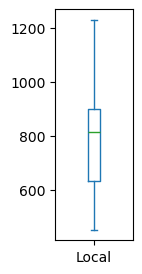

In [72]:
plt.figure(figsize=(1, 3))
local.plot(kind='box', figsize=(1,3));

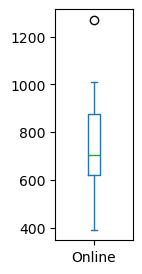

In [71]:
online.plot(kind='box', figsize=(1,3));

<Axes: >

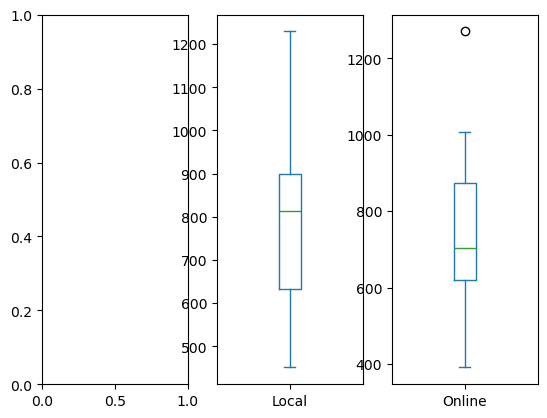

In [79]:
fig, axes = plt.subplots(1, 3);
local.plot(kind='box', ax=axes[1])
online.plot(kind='box', ax=axes[2])

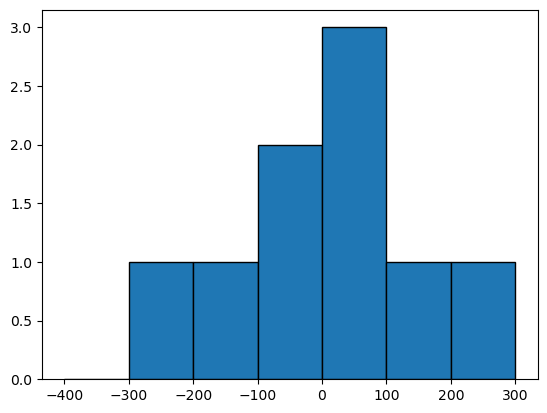

In [85]:
plt.hist(pricediff, bins=range(-400, 400, 100), edgecolor='k');

**Answers to Problem 19**

(a) The histergram helps me decide the online company offers cheaper insurance as I would like to find out whether a price difference between the local insurance agency and the online company.

(b) The local prices and the online prices are paired and they are related to each other.  The local price is high for Car A, then the online price may also high as well.

(c) Paired Data Condition: the data must be paired.  The local price and the online price for the same car.
    Independence Assumption: Each car must be independece of each other.
    Nearly Normal Condition: The population of differences follows a nearly normal model.  Plot a histogram of the differences for checking the nearly normal condition.

**Problem 21.** Online insurance III Exercises 17 and 19 give summaries and displays for car insurance premiums quoted by a local agent and an online company. Test an appropriate hypothesis to see if there is evidence that drivers might save money by switching to the online company.

In [88]:
def sol21():
    
    d0 = 0
    d = difference.mean()
    diff_sum = difference.sum()
    df = len(difference)-1
    sd = difference.std(ddof=1)
    se = sd / sqrt(len(difference))
    tscore = (d - d0) / se
    pval = (1-t.cdf(tscore, df)) * 2
    print(f"P-value: {pval:.4f}")


sol21()

P-value: 0.4300


**Answer to Problem 21**  

$H_0:$ The insurance premium that quotes by the local agency and the online company has no difference:
$\mu_d = 0$.

$H_A:$ The insurance premium that quotes by the local agency is different from the online company:
$\mu_d \neq 0$.

The P-value is 0.43, which is large.  Such large P-value leads me to fail to reject the null hypothesis, and conclude that there is no difference between the insurance premium that quotes by the local agency and the online company.